In [1]:
import numpy as np
import pandas as pd 
import pandas_profiling as pdpf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
carsales_data = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/car_sales.csv", encoding='cp1252')
carsales_data.head()

,car,price,body,mileage,engV,engType,registration,year,model,drive
0,Ford,15500.0,crossover,68,2.5,Gas,yes,2010,Kuga,full
1,Mercedes-Benz,20500.0,sedan,173,1.8,Gas,yes,2011,E-Class,rear
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
3,Mercedes-Benz,17800.0,van,162,1.8,Diesel,yes,2012,B 180,front
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN


In [3]:
#Rename column names
carsales_data.rename(columns={'car':'brand','year':'prod_year'},inplace=True)

In [4]:
carsales_data.shape

(9576, 10)

In [5]:
#Removal of Duplicates
carsales_data.drop_duplicates(keep=False,inplace=True)
carsales_data.shape

(9375, 10)

In [6]:
#Data Profiling
carsales_data.columns

Index(['brand', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'prod_year', 'model', 'drive'],
      dtype='object')

In [7]:
carsales_data.dtypes

brand            object
price           float64
body             object
mileage           int64
engV            float64
engType          object
registration     object
prod_year         int64
model            object
drive            object
dtype: object

In [8]:
carsales_data.head()

,brand,price,body,mileage,engV,engType,registration,prod_year,model,drive
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,CL 550,rear
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,E-Class,NaN
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,Accord,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,E-Class,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,E-Class,rear


In [9]:
carsales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9375 entries, 2 to 9575
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand         9375 non-null   object 
 1   price         9375 non-null   float64
 2   body          9375 non-null   object 
 3   mileage       9375 non-null   int64  
 4   engV          8941 non-null   float64
 5   engType       9375 non-null   object 
 6   registration  9375 non-null   object 
 7   prod_year     9375 non-null   int64  
 8   model         9375 non-null   object 
 9   drive         8866 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 805.7+ KB


In [10]:
carsales_data.describe(include='all')

,brand,price,body,mileage,engV,engType,registration,prod_year,model,drive
count,9375,9375.000000,9375,9375.000000,8941.000000,9375,9375,9375.000000,9375,8866
unique,87,NaN,6,NaN,NaN,4,2,NaN,888,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,E-Class,front
freq,919,NaN,3601,NaN,NaN,4309,8814,NaN,188,5156
mean,NaN,15010.846384,NaN,140.751360,2.637962,NaN,NaN,2006.464107,NaN,NaN
std,NaN,22091.098664,NaN,98.345011,5.991054,NaN,NaN,7.059092,NaN,NaN
min,NaN,0.000000,NaN,0.000000,0.100000,NaN,NaN,1953.000000,NaN,NaN
25%,NaN,4999.000000,NaN,72.000000,1.600000,NaN,NaN,2004.000000,NaN,NaN
50%,NaN,9025.000000,NaN,130.000000,2.000000,NaN,NaN,2008.000000,NaN,NaN
75%,NaN,16300.000000,NaN,196.000000,2.500000,NaN,NaN,2012.000000,NaN,NaN


In [11]:
carsales_data.isnull().sum()

brand             0
price             0
body              0
mileage           0
engV            434
engType           0
registration      0
prod_year         0
model             0
drive           509
dtype: int64

In [12]:
import pandas_profiling

In [13]:
#Pre Profiling
preprofile = pandas_profiling.ProfileReport(carsales_data)
preprofile.to_file("carsales_data_preprocessing.html")

In [14]:
#Preprocessing of data
carsales_data.drop(['model'],axis=1,inplace=True)
carsales_data.head()

,brand,price,body,mileage,engV,engType,registration,prod_year,drive
2,Mercedes-Benz,35000.0,other,135,5.5,Petrol,yes,2008,rear
4,Mercedes-Benz,33000.0,vagon,91,NaN,Other,yes,2013,NaN
6,Honda,6500.0,sedan,199,2.0,Petrol,yes,2003,front
8,Mercedes-Benz,21500.0,sedan,146,1.8,Gas,yes,2012,rear
9,Mercedes-Benz,22700.0,sedan,125,2.2,Diesel,yes,2010,rear


In [15]:
#Dealing with Nan(Zero) values
carsales_data['price'].astype(bool).sum(axis=0)

9151

In [16]:
#9375-9151=224
carsales_data['price'] = carsales_data['price'].replace(0,np.nan)  #This will replace 0 values with Nan

In [17]:
carsales_data['price'].fillna(carsales_data.groupby('brand')['price'].transform('mean'),inplace=True)#Replace Nan with mean

In [18]:
carsales_data[carsales_data['price'].isnull()]

,brand,price,body,mileage,engV,engType,registration,prod_year,drive
8824,Fisker,NaN,other,100,NaN,Other,yes,2001,NaN


In [19]:
#Drop this null value
carsales_data.drop(carsales_data[carsales_data['price'].isnull()].index, inplace=True)

In [20]:
#Now deal with mileage zero value
carsales_data['mileage'].astype(bool).sum(axis=0)        #Print non zero values

9089

In [21]:
#mileage column has 9089 non zero values out of 9374 values  9374-9089=285
carsales_data['mileage'] = carsales_data['mileage'].replace(0,np.nan)  #Replace zero value with Nan value


In [22]:
#This will replace Nan value with mean
carsales_data['mileage'].fillna(carsales_data.groupby('brand')['mileage'].transform('mean'),inplace=True)

In [23]:
carsales_data[carsales_data['mileage'].isnull()]

,brand,price,body,mileage,engV,engType,registration,prod_year,drive


In [24]:
#Replacing null value of with mean value
carsales_data.isnull().sum()

brand             0
price             0
body              0
mileage           0
engV            433
engType           0
registration      0
prod_year         0
drive           508
dtype: int64

In [25]:
#This will replace Nan with mode
carsales_data['engV'].fillna(carsales_data['engV'].mean(), inplace=True)

In [26]:
carsales_data.isnull().sum()

brand             0
price             0
body              0
mileage           0
engV              0
engType           0
registration      0
prod_year         0
drive           508
dtype: int64

In [27]:
carsales_data['drive'].fillna(carsales_data['drive'].mode()[0], inplace=True)

In [28]:
carsales_data.isnull().sum()

brand           0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
prod_year       0
drive           0
dtype: int64

In [29]:
#Post profiling of Data
postprofile = pandas_profiling.ProfileReport(carsales_data)
postprofile.to_file("carsales_data_preprocessing.html")

In [30]:
carsales_data.describe(include='all')

,brand,price,body,mileage,engV,engType,registration,prod_year,drive
count,9374,9374.000000,9374,9374.000000,9374.000000,9374,9374,9374.000000,9374
unique,86,NaN,6,NaN,NaN,4,2,NaN,3
top,Volkswagen,NaN,sedan,NaN,NaN,Petrol,yes,NaN,front
freq,919,NaN,3601,NaN,NaN,4309,8813,NaN,5664
mean,NaN,15517.081150,NaN,145.255332,2.637962,NaN,NaN,2006.464690,NaN
std,NaN,22168.588839,NaN,95.358965,5.851035,NaN,NaN,7.059242,NaN
min,NaN,259.350000,NaN,1.000000,0.100000,NaN,NaN,1953.000000,NaN
25%,NaN,5400.000000,NaN,80.000000,1.600000,NaN,NaN,2004.000000,NaN
50%,NaN,9500.000000,NaN,133.000000,2.000000,NaN,NaN,2008.000000,NaN
75%,NaN,16999.000000,NaN,196.000000,2.637962,NaN,NaN,2012.000000,NaN


In [31]:
#Questions 
# 1. Which brand of car sold most?

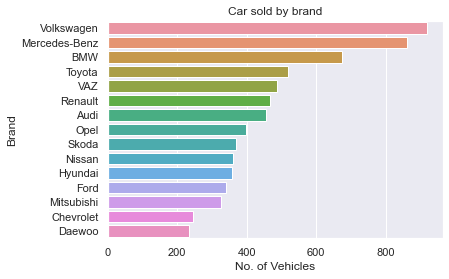

<Figure size 432x288 with 0 Axes>

In [57]:
#top 30 brands whic cars sold the most
sns.countplot(y='brand',data=carsales_data, order=carsales_data['brand'].value_counts().nlargest(15).index)
plt.title("Car sold by brand")
plt.ylabel('Brand')
plt.xlabel('No. of Vehicles');
plt.show()
plt.savefig("carsoldbybrand.png")

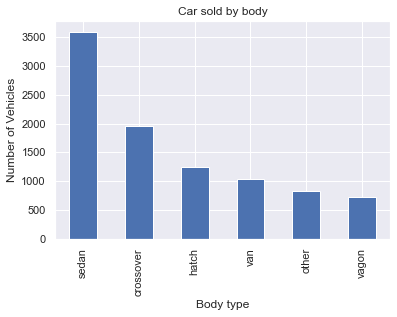

In [58]:
#2. Which body segments of cars sold the most?
carsales_data['body'].value_counts().plot.bar()       #Bar chart for car body variable.
plt.title("Car sold by body")
plt.ylabel('Number of Vehicles')
plt.xlabel('Body type');

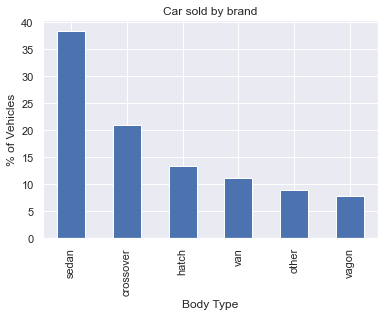

In [34]:
(carsales_data['body'].value_counts() / len(carsales_data)*100).plot.bar()
plt.title("Car sold by brand")
plt.ylabel('% of Vehicles')
plt.xlabel('Body Type');

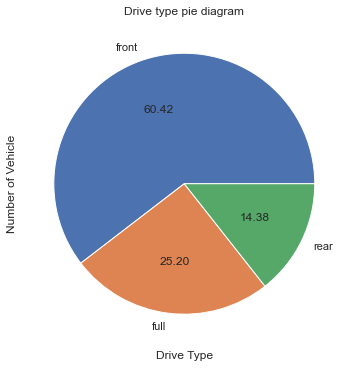

In [35]:
#Which drive segment of cars in which body type sld the most?
carsales_data['drive'].value_counts().plot.pie(figsize=(6,6),autopct='%.2f')
plt.title("Drive type pie diagram")
plt.ylabel('Number of Vehicle')
plt.xlabel('Drive Type');

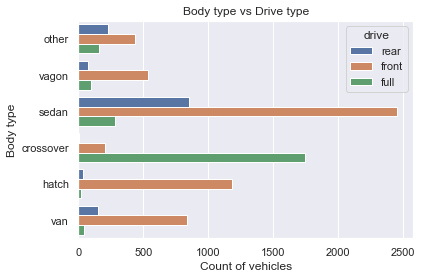

In [36]:
#Body type and Drive type analysis
sns.countplot(y='body', data=carsales_data, hue='drive')
plt.title("Body type vs Drive type")
plt.ylabel('Body type')
plt.xlabel('Count of vehicles');

In [37]:
#Which price segment cars sold the most?
carsales_data['price'].min()

259.35

In [38]:
carsales_data['price'].max()

547800.0

In [39]:
#Create a new column price group
carsales_data['price_group'] = pd.cut(carsales_data['price'], [0,20000,40000,60000,80000,100000,600000], labels = ['<20K','20-39K','40-59K','60-79K','80-99K','>100K'], include_lowest = True)
carsales_data['price_group'] = carsales_data['price_group'].astype(object)

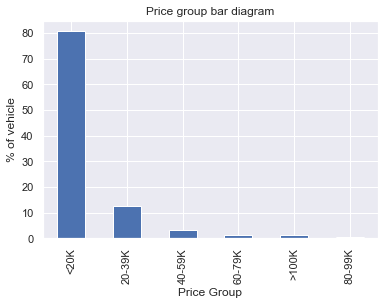

In [40]:
(carsales_data['price_group'].value_counts() / len(carsales_data)*100).plot.bar()
plt.title("Price group bar diagram")
plt.xlabel('Price Group')
plt.ylabel('% of vehicle');

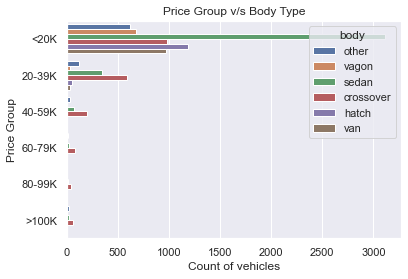

In [41]:
#How does price related to body and drive type of car?
#Body type vs price group
sns.countplot(y='price_group',data=carsales_data, hue='body', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])           
plt.title("Price Group v/s Body Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

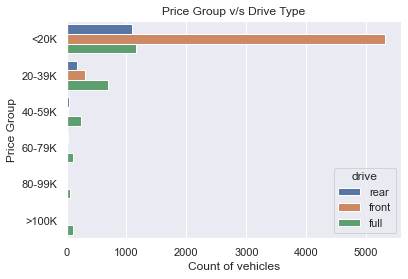

In [42]:
#Price group vs drive type
sns.countplot(y='price_group',data=carsales_data, hue='drive', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])           
plt.title("Price Group v/s Drive Type")
plt.ylabel('Price Group')
plt.xlabel('Count of vehicles');

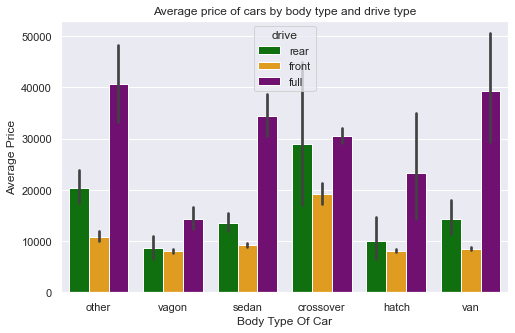

In [43]:
#Average price of vehicles by body type and drive type 
fig,ax = plt.subplots(figsize=(8,5))
colors = ["green", "orange","purple"]
sns.barplot(x="body", y="price",hue="drive", palette=colors, data=carsales_data)
ax.set_title("Average price of cars by body type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Body Type Of Car",fontdict= {'size':12})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':12})
plt.show()

C:\Anaconda\Anaconda3.7\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


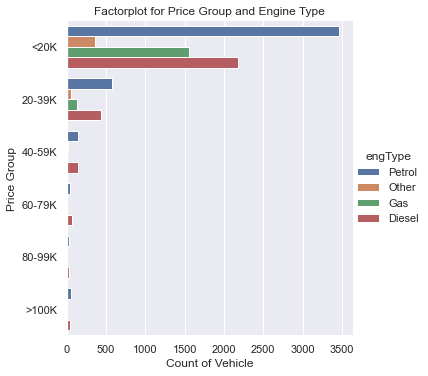

In [44]:
#Does the engType have any impact on price of car?
#Price group vs engType
sns.factorplot(y='price_group', data=carsales_data, hue='engType', kind='count', order=['<20K','20-39K','40-59K','60-79K','80-99K','>100K'])
plt.title('Factorplot for Price Group and Engine Type')
plt.ylabel('Price Group')
plt.xlabel('Count of Vehicle');

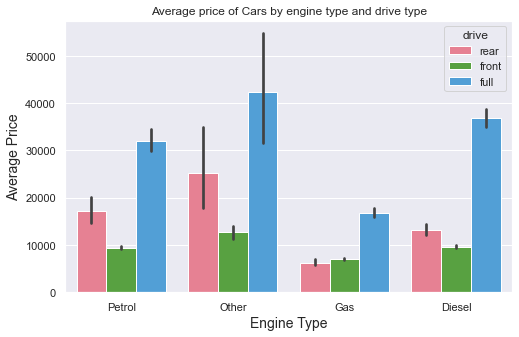

In [45]:
#How does price relate to engine type and drive type of the car?
fig, ax = plt.subplots(figsize=(8,5))
colors = ["pink", "green","blue"]
sns.barplot(x="engType", y="price",hue="drive", palette="husl",data=carsales_data)
ax.set_title("Average price of Cars by engine type and drive type",fontdict= {'size':12})
ax.xaxis.set_label_text("Engine Type",fontdict= {'size':14})
ax.yaxis.set_label_text("Average Price",fontdict= {'size':14})
plt.show()

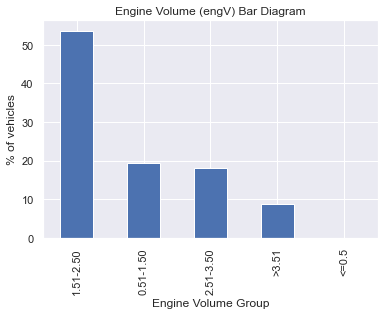

In [46]:
#Which engine volume cars sold the most?
(pd.cut(carsales_data['engV'],[0,0.51,1.51,2.51,3.51,100], 
        labels = ['<=0.5','0.51-1.50','1.51-2.50','2.51-3.50','>3.51']).value_counts() / len(carsales_data)*100).plot.bar()
plt.title("Engine Volume (engV) Bar Diagram")
plt.ylabel('% of vehicles')
plt.xlabel('Engine Volume Group');

(0.0, 6.0)

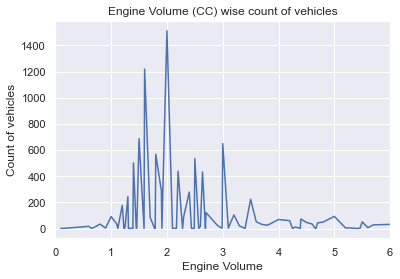

In [47]:
#Engine volume wise count vehicles
careng = carsales_data.loc[carsales_data['engV'] <= 6]
careng['engV'].value_counts().sort_index().plot.line()
plt.title("Engine Volume (CC) wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Engine Volume');
plt.xlim(0,6)


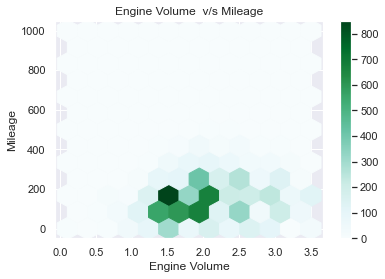

In [48]:
#How does engine volume (engV) relate to mileage of the car?
#engV vs mileage
carsales_data[carsales_data['engV']<3.51].plot.hexbin(x='engV', y='mileage', sharex=False, gridsize=12)
plt.title("Engine Volume  v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Engine Volume');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


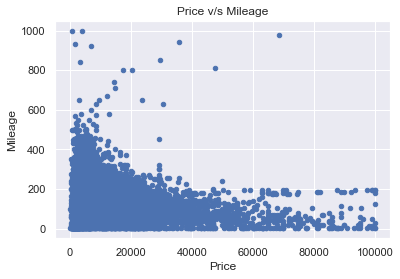

In [49]:
#Price vs mileage
carsales_data[carsales_data['price'] < 100000 ].plot.scatter(x='price', y='mileage')
plt.title("Price v/s Mileage")
plt.ylabel('Mileage')
plt.xlabel('Price');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


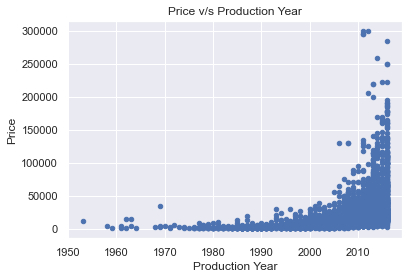

In [50]:
#Price vs production year
carsales_data[carsales_data['price'] <= 300000].plot.scatter(x='prod_year',y='price')
plt.title("Price v/s Production Year")
plt.ylabel('Price')
plt.xlabel('Production Year');

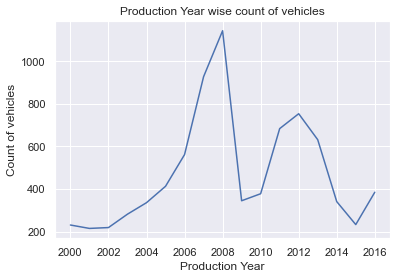

In [51]:
#Which production year of cars sold the most?
#Production year wise count of vehicles.
caryr = carsales_data.loc[carsales_data['prod_year'] >= 2000]
caryr['prod_year'].value_counts().sort_index().plot.line()
plt.title("Production Year wise count of vehicles")
plt.ylabel('Count of vehicles')
plt.xlabel('Production Year');

C:\Anaconda\Anaconda3.7\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Anaconda\Anaconda3.7\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


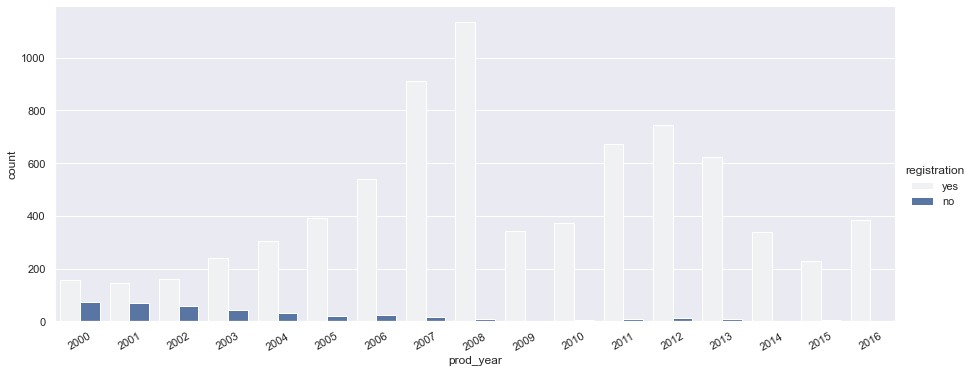

In [52]:
#Production year vs registration
cc = carsales_data.loc[carsales_data['prod_year'] >= 2000]

g = sns.factorplot('prod_year',data=cc,aspect=2.5, kind='count',hue='registration',color="b")
g.set_xticklabels(rotation=30)

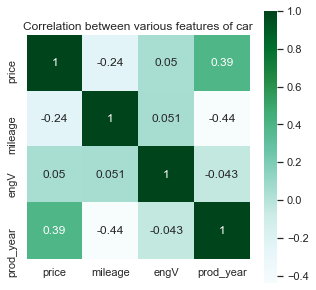

In [53]:
#Correlation in various featurs of car data
car_corr = carsales_data.corr()
car_corr
plt.figure(figsize=(5,5))
sns.heatmap(car_corr,vmax=1,square=True,annot=True, cmap='BuGn')
plt.title("Correlation between various features of car")
plt.show()
